# 吴恩达机器学习习题一：多变量线性回归<br>
- 习题：你想要卖房，手里有一些数据，根据这些数据预测你房子的价格。

# 相关函数公式：<br><br>
![函数公式](./IMG_3292.JPG)

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#读取数据并做归一化
data = pd.read_csv('ex1data2.txt',names=['size','number','price'])
def normalize_feature(date):
    return (data-data.mean())/data.std()  #mean()求均值，std()求方差
data = normalize_feature(data)

In [6]:
data.insert(0,'ones',1)
X = data.iloc[:,0:3]
y = data.iloc[:,-1]
X = np.array(X)
y = np.array(y)
y = y.reshape(47,1)

In [7]:
def cost_function(X,y,theta):
    inner =np.power(X@theta-y,2)
    return np.sum(inner)/(2*len(y))
theta = np.zeros((3,1))

In [8]:
def gradient_descent_function(X,y,theta,alpha,times):
    costs = []
    for i in range(times):  #迭代times次
        theta = theta-alpha*(X.T@(X@theta-y))/len(y)
        cost = cost_function(X,y,theta)
        costs.append(cost)
    return costs,theta

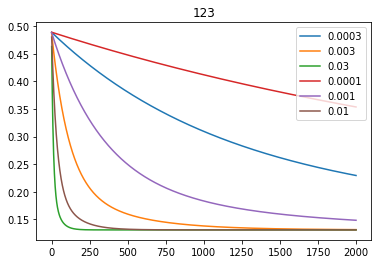

In [10]:
alphas=[0.0003,0.003,0.03,0.0001,0.001,0.01]
times=2000
fig,ax=plt.subplots()
for alpha in alphas:
    costs,_=gradient_descent_function(X,y,theta,alpha,times)
    ax.plot(range(times),costs,label=alpha)
    ax.legend()
plt.show()